# Sklearn库

## 思维导图
![dt1](./pcs/dt1.png "dt1")

scikit-learn 库是当今最流行的机器学习算法库之一

可用来解决分类与回归问题

本章以鸢尾花数据集为例，简单了解八大传统机器学习分类算法的sk-learn实现

欲深入了解传统机器学习算法的原理和公式推导，请继续学习《统计学习方法》或《西瓜书》

## 0. 鸢尾花数据集

[1]. 下载数据集

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset("iris")

[2]. 数据集的查看

In [3]:
type(iris)

pandas.core.frame.DataFrame

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

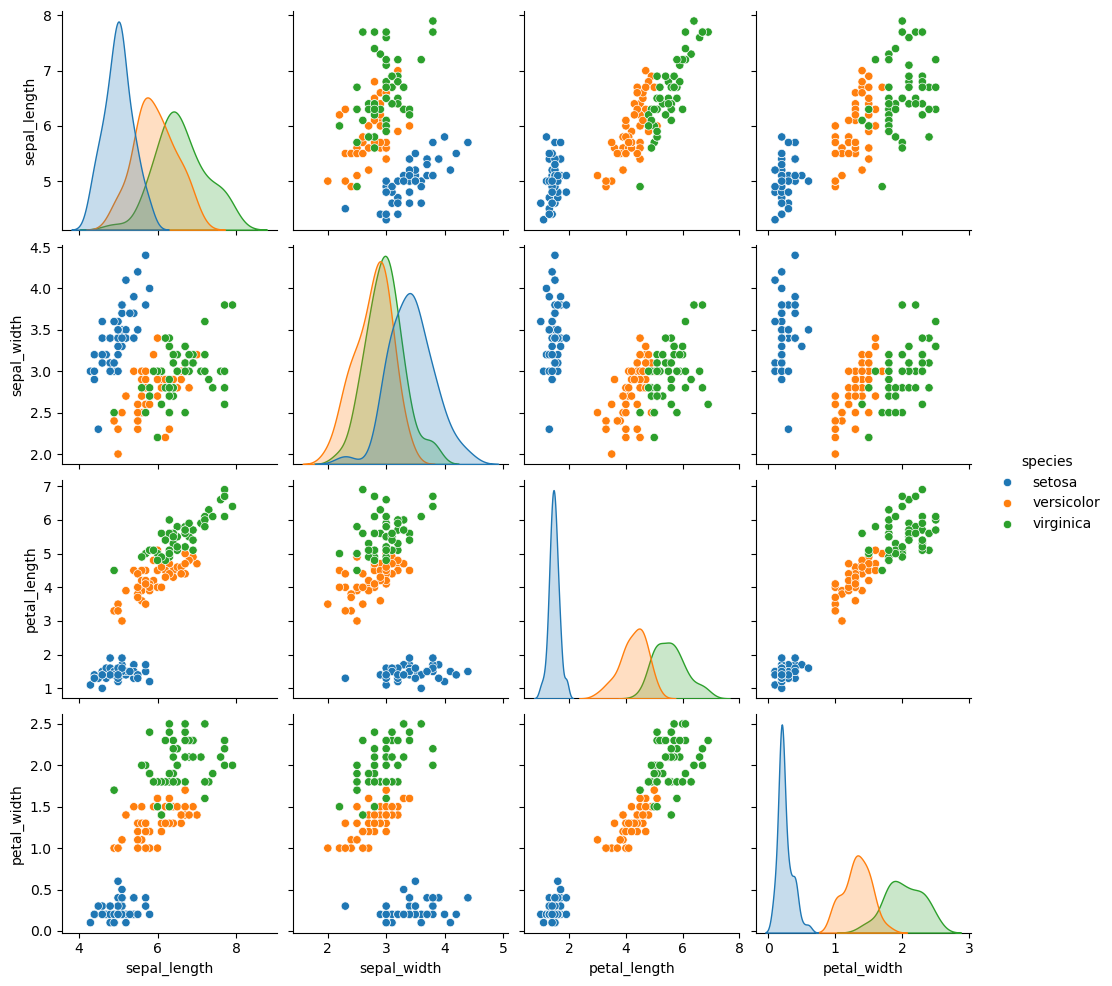

In [8]:
sns.pairplot(data = iris, hue = "species")

[3]. 标签清洗

In [9]:
iris_simple = iris.drop(["sepal_length", "sepal_width"], axis = 1)
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,setosa
1,1.4,0.2,setosa
2,1.3,0.2,setosa
3,1.5,0.2,setosa
4,1.4,0.2,setosa


[4]. 标签编码

In [10]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
iris_simple["species"] = encoder.fit_transform(iris_simple["species"])

In [11]:
iris_simple.head()

,petal_length,petal_width,species
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0


[5]. 数据集的标准化（本数据集特征比较接近，实际处理过程中未标准化）

In [12]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [13]:
trans = StandardScaler()
_iris_simple = trans.fit_transform(iris_simple[["petal_length", "petal_width"]])
_iris_simple = pd.DataFrame(_iris_simple, columns = ["petal_length", "petal_width"])
_iris_simple.describe()

,petal_length,petal_width
count,1.500000e+02,1.500000e+02
mean,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00
min,-1.567576e+00,-1.447076e+00
25%,-1.226552e+00,-1.183812e+00
50%,3.364776e-01,1.325097e-01
75%,7.627583e-01,7.906707e-01
max,1.785832e+00,1.712096e+00


[6]. 构建训练集和测试集（暂不考虑验证集）

In [14]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(iris_simple, test_size = 0.2)
test_set.head()

,petal_length,petal_width,species
10,1.5,0.2,0
39,1.5,0.2,0
77,5.0,1.7,1
80,3.8,1.1,1
100,6.0,2.5,2


In [15]:
iris_x_train = train_set[["petal_length", "petal_width"]]
iris_x_train.head()

,petal_length,petal_width
147,5.2,2.0
122,6.7,2.0
28,1.4,0.2
121,4.9,2.0
9,1.5,0.1


In [16]:
iris_y_train = train_set["species"].copy()
iris_y_train.head()

147    2
122    2
28     0
121    2
9      0
Name: species, dtype: int32

In [17]:
iris_x_test = test_set[["petal_length", "petal_width"]]
iris_x_test.head()

,petal_length,petal_width
10,1.5,0.2
39,1.5,0.2
77,5.0,1.7
80,3.8,1.1
100,6.0,2.5


In [18]:
iris_y_test = test_set["species"].copy()
iris_y_test.head()

10     0
39     0
77     1
80     1
100    2
Name: species, dtype: int32

# 1. k近邻算法
[1]. 基本思想

与待测点最近的训练数据集中的k个邻居

把k个近邻中最常见的类别预测为带预测点的类型

![k](./pcs/k.png "k")

[2]. sklearn实现

In [19]:
from sklearn.neighbors import KNeighborsClassifier

- 构建分类器对象

In [20]:
clf = KNeighborsClassifier()
clf

KNeighborsClassifier()

- 训练

In [21]:
clf.fit(iris_x_train, iris_y_train)

KNeighborsClassifier()

- 预测

In [22]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]


- 翻转

In [23]:
encoder.inverse_transform(res)

array(['setosa', 'setosa', 'virginica', 'versicolor', 'virginica',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'setosa', 'setosa', 'versicolor', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'versicolor', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

- 评估

In [24]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


- 存储数据

In [25]:
out = iris_x_test.copy()
out["y"] = iris_y_test
out["pre"] = res
out

,petal_length,petal_width,y,pre
10,1.5,0.2,0,0
39,1.5,0.2,0,0
77,5.0,1.7,1,2
80,3.8,1.1,1,1
100,6.0,2.5,2,2
144,5.7,2.5,2,2
1,1.4,0.2,0,0
34,1.5,0.2,0,0
99,4.1,1.3,1,1
64,3.6,1.3,1,1


In [26]:
out.to_csv("./pcs/iris_predict.csv")

[3]. 可视化

In [27]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def draw(clf):
    
    # 网格化
    M, N = 500, 500
    x1_min, x2_min = iris_simple[["petal_length", "petal_width"]].min(axis = 0)
    x1_max, x2_max = iris_simple[["petal_length", "petal_width"]].max(axis = 0)
    t1 = np.linspace(x1_min, x1_max, M)
    t2 = np.linspace(x2_min, x2_max, N)
    x1, x2 = np.meshgrid(t1, t2)
    
    # 预测
    x_show = np.stack((x1.flat, x2.flat), axis = 1)
    y_predict = clf.predict(x_show)
    
    # 配色
    cm_light = mpl.colors.ListedColormap(["#A0FFA0", "#FFA0A0", "#A0A0FF"])
    cm_dark = mpl.colors.ListedColormap(["g", "r", "b"])
    
    # 绘制预测区域图
    plt.figure(figsize = (10, 6))
    plt.pcolormesh(t1, t2, y_predict.reshape(x1.shape), cmap = cm_light)
    
    # 绘制原始数据点
    plt.scatter(iris_simple["petal_length"], iris_simple["petal_width"], label = None,
               c = iris_simple["species"], cmap = cm_dark, marker = 'o', edgecolors = 'k')
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    
    # 绘制图例
    color = ["g", "r", "b"]
    species = ["setosa", "virginica", "versicolor"]
    for i in range(3):
        plt.scatter([], [], c = color[i], s = 40, label = species[i])  # 利用空点绘制图例
    plt.legend(loc = "best")
    plt.title('iris_classfier')
    plt.show()

d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


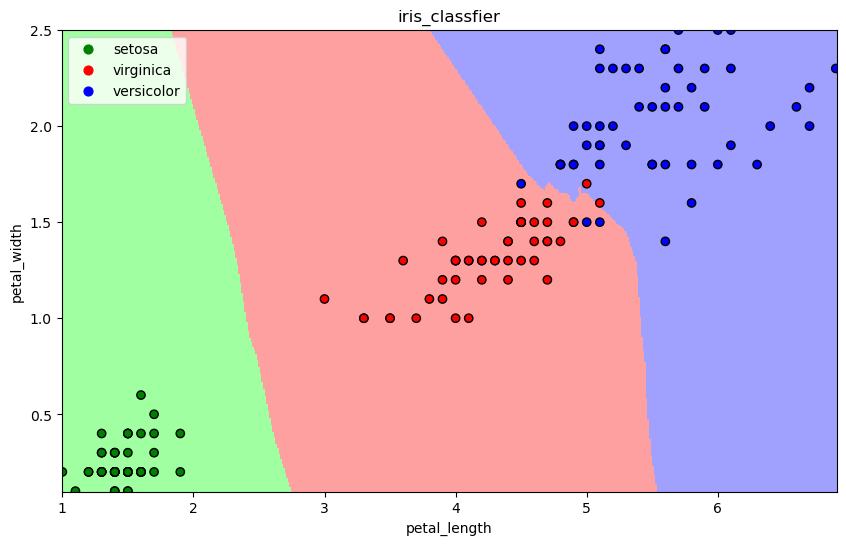

In [28]:
draw(clf)

## 2. 朴素贝叶斯算法

[1]. 基本思想

当X = (x1, x2)发生的时候，哪一个yk发生的概率最大

[2]. sklearn实现

In [29]:
from sklearn.naive_bayes import GaussianNB

- 构建分类器对象

In [30]:
clf = GaussianNB()
clf

GaussianNB()

- 训练

In [31]:
clf.fit(iris_x_train, iris_y_train)

GaussianNB()

- 预测

In [32]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]


- 评估

In [33]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


- 可视化

d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


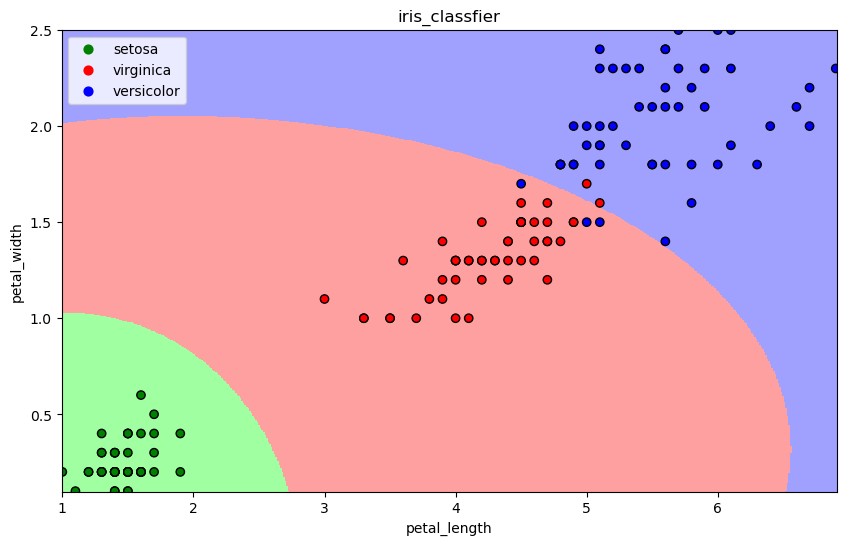

In [34]:
draw(clf)

## 决策树算法

[1]. 基本思想

CART算法：每次通过一个特征，将数据尽可能的分为纯净的两类，递归的分下去

[2]. sklearn实现

In [35]:
from sklearn.tree import DecisionTreeClassifier

- 构建分类器

In [36]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

- 训练

In [37]:
clf.fit(iris_x_train, iris_y_train)

DecisionTreeClassifier()

- 预测

In [38]:
res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]


- 评估

In [39]:
accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

预测正确率：97%


- 可视化

d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


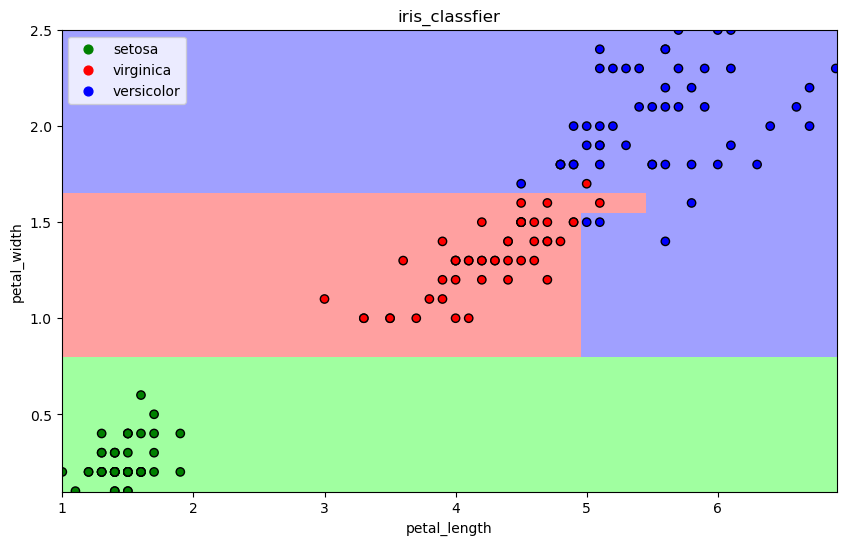

In [40]:
draw(clf)

## 4. 逻辑回归算法

[1]. 基本思想

一种解释：

训练：通过一种映射方式，将特征X = (x1, x2) 映射成P(y = ck), 求使得所有概率之积最大化的映射方式里的参数

预测：计算p(y = ck)取概率最大的哪个类别作为预测对象的分类

[2]. sklearn实现

In [41]:
from sklearn.linear_model import LogisticRegression

- 构建分类器对象

In [42]:
clf = LogisticRegression(solver = 'saga', max_iter = 1000)
clf

LogisticRegression(max_iter=1000, solver='saga')

- 训练， 预测，评估，可视化

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
预测正确率：97%


d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


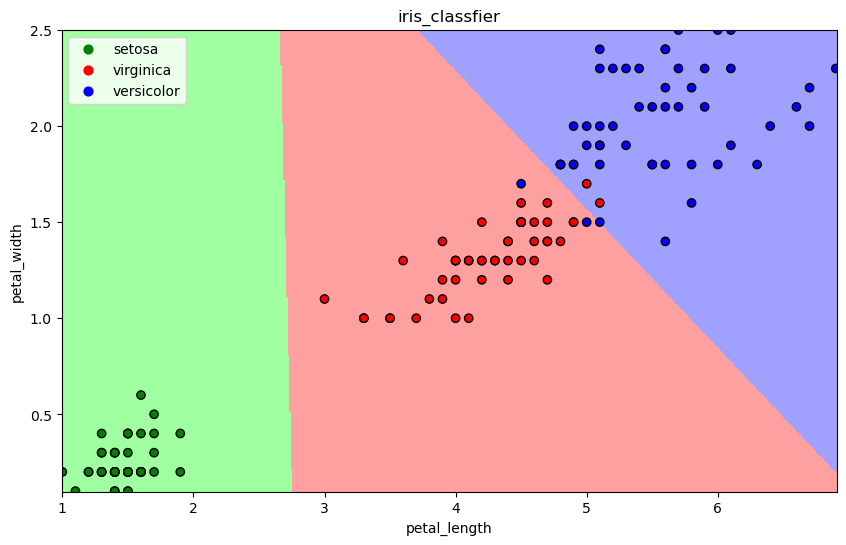

In [43]:
clf.fit(iris_x_train, iris_y_train)

res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

draw(clf)

## 支持向量机算法

[1]. 基本思想

以二分类为例，假设数据可用一个超平面完全分开：

用一个超平面将两类数据完全分开，且最近点到平面的距离最大
![svc](./pcs/svc.png "svc")

[2]. sklearn实现

In [44]:
from sklearn.svm import SVC

- 构建分类器

In [45]:
clf = SVC()
clf

SVC()

- 训练，预测，评估，可视化

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
预测正确率：97%


d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


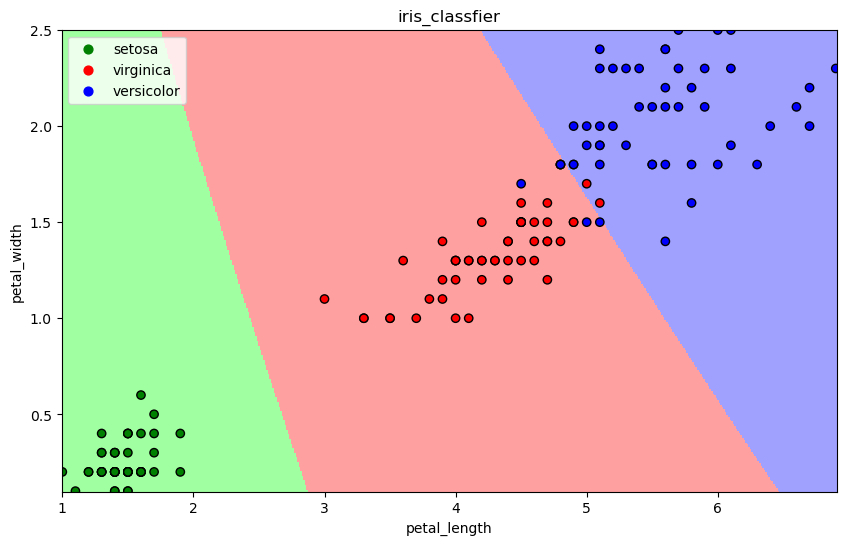

In [46]:
clf.fit(iris_x_train, iris_y_train)

res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

draw(clf)

## 集成算法——随机森林

[1]. 训练集m, 有放回的随机抽取m个数据，构成一组，共抽取n组采样集，n组采样集训练得到n个弱分类器，弱分类器一般用决策树或神经网络将n个弱分类器组合得到强分类器

[2]. sklearn实现

In [47]:
from sklearn.ensemble import RandomForestClassifier

- 构建分类器对象

In [48]:
clf = RandomForestClassifier()
clf

RandomForestClassifier()

- 训练，预测，评估，可视化

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
预测正确率：97%


d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


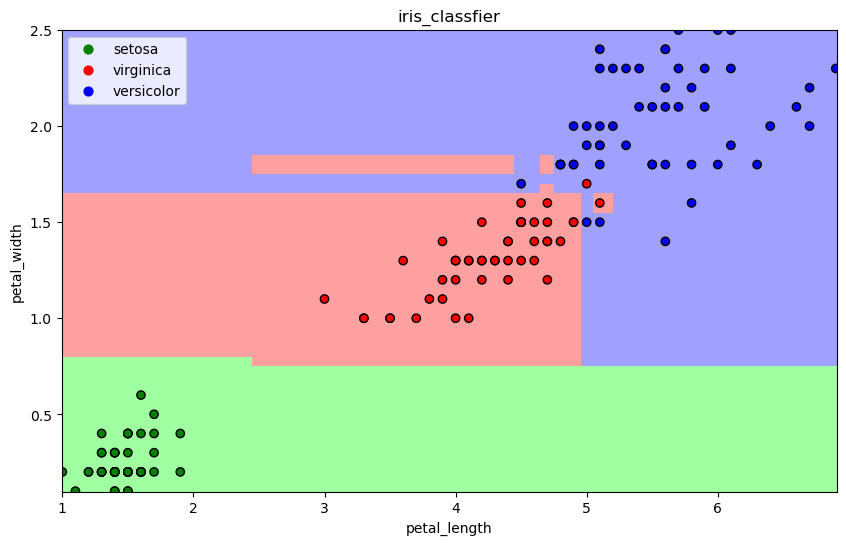

In [49]:
clf.fit(iris_x_train, iris_y_train)

res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

draw(clf)

## 7. 集成方法——Adaboost

[1]. 基本思想

训练集m, 用初始数据权重训练得到第一个弱分类器，根据误差率计算弱分类器系数，更新数据的权重

使用新的权重训练得到第二个弱分类器，以此类推

根据各自的系数，将所有弱分类器加权求和获得强分类器

[2]. sklearn实现

In [50]:
from sklearn.ensemble import AdaBoostClassifier

- 构建分类器对象

In [51]:
clf = AdaBoostClassifier()
clf

AdaBoostClassifier()

- 训练，预测，评估，可视化

d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


[0 0 2 1 2 2 0 0 1 1 0 1 1 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
预测正确率：93%


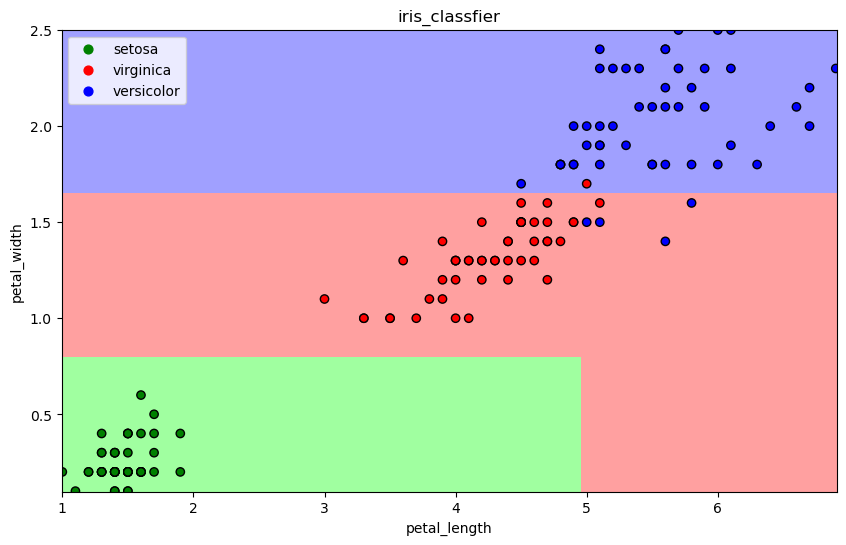

In [52]:
clf.fit(iris_x_train, iris_y_train)

res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

draw(clf)

## 8. 集成方法——梯度提升树GBDT

[1]. 基本思想

训练集m, 获得第一个弱分类器，获得残差，然后不断地拟合残差

所有弱分类器相加得到强分类器

[2]. sklearn实现

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

- 构建分类器对象

In [54]:
clf = GradientBoostingClassifier()
clf

GradientBoostingClassifier()

- 训练，预测，评估，可视化

[0 0 2 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
[0 0 1 1 2 2 0 0 1 1 0 1 2 0 2 0 0 1 0 0 2 1 0 1 0 1 2 1 0 2]
预测正确率：97%


d:\WorkSoftware\Install\Anaconda3\envs\pytorch_2.5.1\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


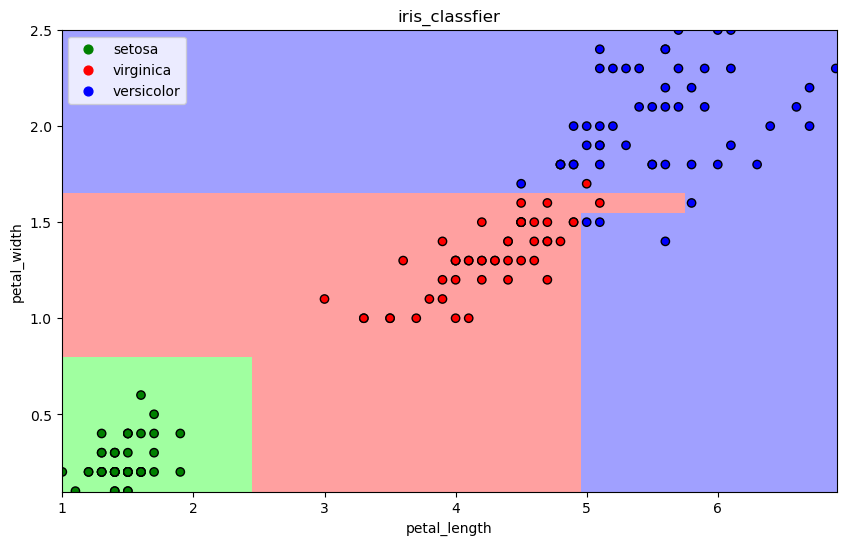

In [55]:
clf.fit(iris_x_train, iris_y_train)

res = clf.predict(iris_x_test)
print(res)
print(iris_y_test.values)

accuracy = clf.score(iris_x_test, iris_y_test)
print("预测正确率：{:.0%}".format(accuracy))

draw(clf)

## 大杀器

[1]. xgboost

GBDT的损失函数只对误差部分做负梯度（一阶泰勒）展开

XGBoost损失函数对误差部分做二阶泰勒展开，更加准确，更快收敛

[2]. lightgbm

微软：快速的，分布式的，高性能的基于决策树算法的梯度提升框架

速度更快

[3]. stacking

堆叠或者叫模型融合

先建立几个简单的模型进行训练，第二级学习器会基于前级模型的预测结果进行再训练

[4]. 神经网络